Case Study on Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('/content/car_age_price.csv')

In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [11]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [12]:
num_columns = ['Year','Price']

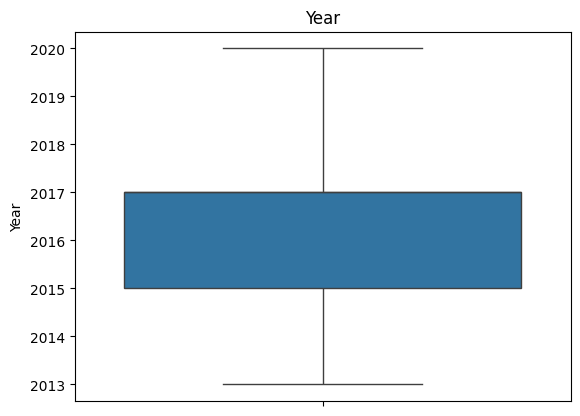

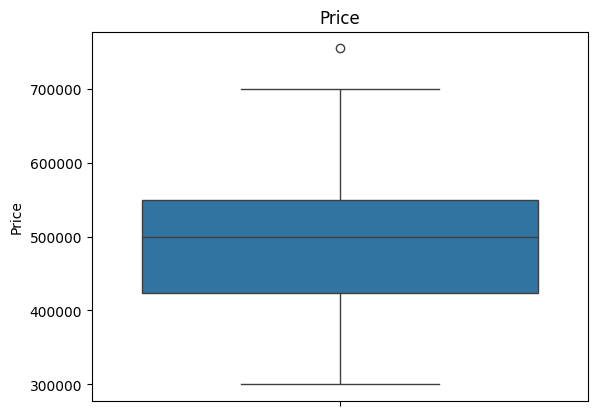

In [13]:
for z in num_columns:
    plt.figure()
    sns.boxplot(data=data[z])
    plt.title(z)
    plt.show()

In [14]:
# Calculate Quartiles                                     #USING IQR TEST TO REMOVE OUTLIERS AND CLIPPING THEM OFF
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define Lower and Upper Limits
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Identify Outliers
outliers = (data['Price'] < lower_lim) | (data['Price'] > upper_lim)

# Clip Outliers
data.loc[outliers, 'Price'] = np.clip(data.loc[outliers, 'Price'], lower_lim, upper_lim)

In [15]:
num_columns2 = ['Year','Price']

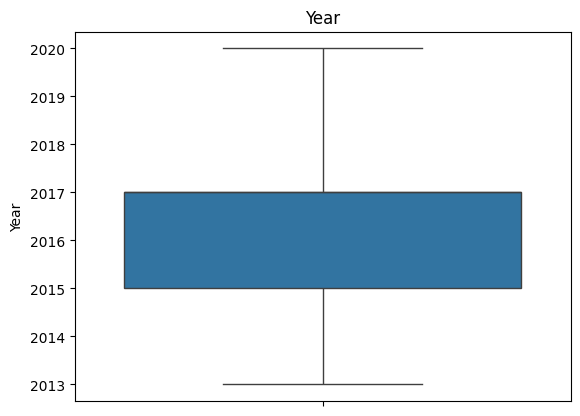

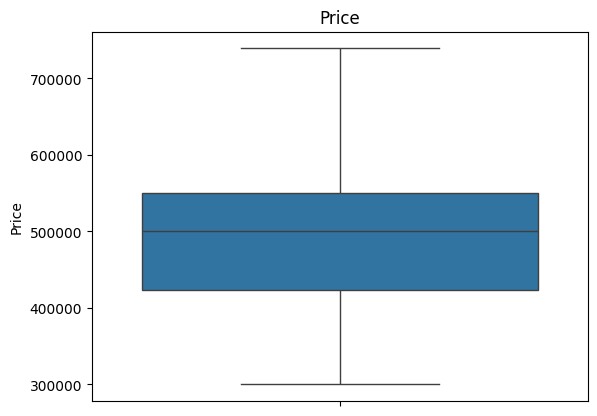

In [16]:
for p in num_columns2:
    plt.figure()
    sns.boxplot(data=data[p])
    plt.title(p)
    plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [18]:
data['Year'].nunique()

8

In [19]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [20]:
data.head()

,Year,Price
0,2018,465000
1,2019,739375
2,2019,700000
3,2018,465000
4,2018,465000


In [21]:
data.corr()

,Year,Price
Year,1.000000,0.777568
Price,0.777568,1.000000


<Axes: >

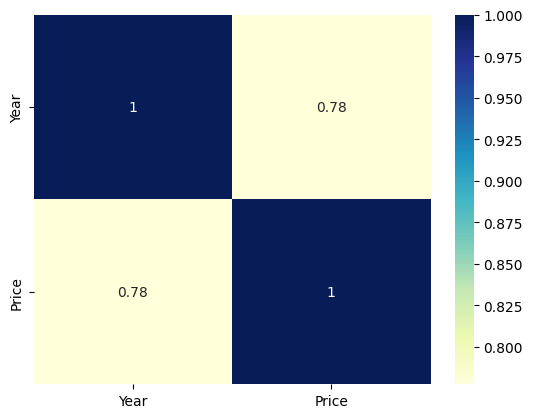

In [22]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)      #DISPLAYING THEM IN HEATMAPS


LINEAR_MODEL REGRESSION

In [23]:
Y = data['Price'].values.reshape(-1,1)    #TARGET VARIABLE OR DEPENDENT VARIABLE


In [24]:
X = data['Year'].values.reshape(-1,1)     #INDEPENDENT VARIABLE


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=.25)

In [27]:
from sklearn import linear_model

In [28]:
lin_reg = linear_model.LinearRegression()



In [29]:
lin_model = lin_reg.fit(X_train,Y_train)

In [30]:
lin_pred = lin_model.predict(X_test)

In [31]:
lin_pred

array([[598603.37714288],
       [505004.25714287],
       [551803.81714287],
       [551803.81714287],
       [551803.81714287],
       [411405.13714287],
       [505004.25714287],
       [551803.81714287],
       [598603.37714288],
       [598603.37714288],
       [317806.01714288],
       [505004.25714287],
       [411405.13714287],
       [645402.93714286],
       [551803.81714287],
       [598603.37714288],
       [317806.01714288],
       [411405.13714287],
       [505004.25714287],
       [505004.25714287],
       [505004.25714287],
       [505004.25714287],
       [505004.25714287],
       [505004.25714287],
       [505004.25714287],
       [505004.25714287],
       [411405.13714287],
       [411405.13714287]])

In [32]:
X_new = pd.DataFrame({'Year':[2022]}).values.reshape(-1,1)    #predict the possible price of a 2022 model second-hand grand i10


In [33]:
Y_pred = lin_model.predict(X_new)

In [34]:
Y_pred #predict the possible price of a 2022 model second-hand grand i10

array([[739002.05714287]])

Linear_model predict:- Rs 739002.05714287

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
print('MSE is',mean_squared_error(Y_test,lin_pred))

MSE is 3856123887.8510513


In [38]:
# Evaluate the model
MSE = mean_squared_error(Y_test,lin_pred)
R2 = r2_score(Y_test,lin_pred)
print("Mean Squared Error:", MSE)
print("R-squared Score:", R2)

Mean Squared Error: 3856123887.8510513
R-squared Score: 0.4380956804935515


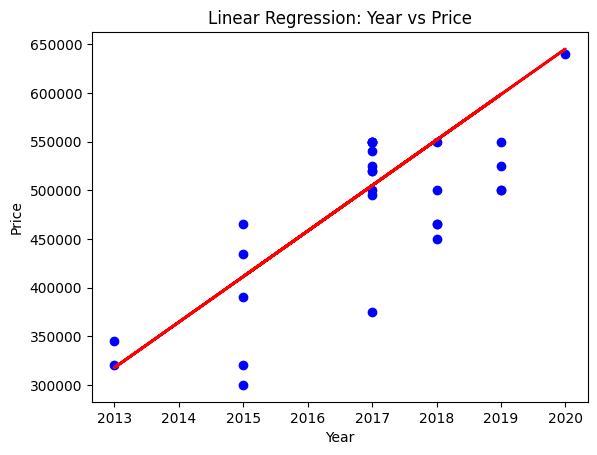

In [39]:
# Visualize the results (optional)
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, lin_pred, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression: Year vs Price')
plt.show()

 LASSO REGRESSION

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score



In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



In [42]:
alpha = 0.1  # Regularization parameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, Y_train)


Lasso(alpha=0.1)

In [43]:
Y_pred = lasso_model.predict(X_test)


In [44]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3856120811.044556
R-squared Score: 0.4380961288377724


In [45]:
X_new2 = pd.DataFrame({'Year':[2022]}).values.reshape(-1,1) #predict the possible price of a 2022 model second-hand grand i10


In [46]:
Y_pred2 = lasso_model.predict(X_new2) #predict the possible price of a 2022 model second-hand grand i10

In [47]:
Y_pred2

array([739001.84090523])

lasso_model.predict:- Rs 739001.84090523

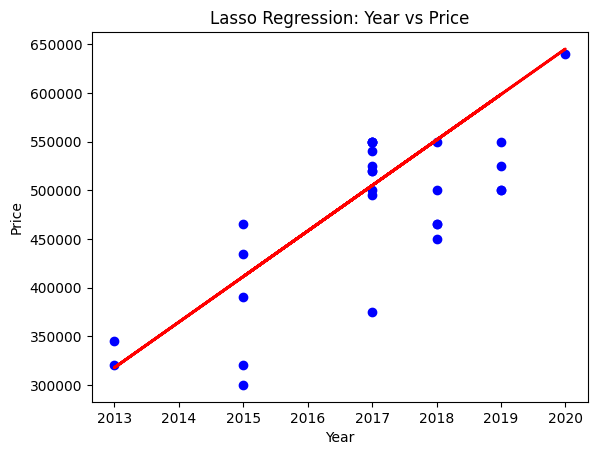

In [48]:
# Visualize the results (optional)
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression: Year vs Price')
plt.show()


NOW WITH SCALING:-
LINEAR MODEL

In [49]:
from sklearn.preprocessing import StandardScaler #STANDARD SCALING IS DONE ON BOTH DEPENDENT AND INDEPENDENT VARIABLES
sc=StandardScaler()
X_sc=sc.fit_transform(X)
Y_sc=sc.fit_transform(Y)
X_sc=pd.DataFrame(X_sc)
Y_sc=pd.DataFrame(Y_sc)

In [ ]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_sc,random_state=42,test_size=.25)


In [ ]:
from sklearn import linear_model

In [51]:
lin_reg = linear_model.LinearRegression()

In [52]:
lin_model = lin_reg.fit(X_train,Y_train)

In [53]:
lin_pred = lin_model.predict(X_test)

In [54]:
lin_pred

array([[ 1.27070856],
       [ 0.23536322],
       [ 0.75303589],
       [ 0.75303589],
       [ 0.75303589],
       [-0.79998213],
       [ 0.23536322],
       [ 0.75303589],
       [ 1.27070856],
       [ 1.27070856],
       [-1.83532748],
       [ 0.23536322],
       [-0.79998213],
       [ 1.78838124],
       [ 0.75303589],
       [ 1.27070856],
       [-1.83532748],
       [-0.79998213],
       [ 0.23536322],
       [ 0.23536322],
       [ 0.23536322],
       [ 0.23536322],
       [ 0.23536322],
       [ 0.23536322],
       [ 0.23536322],
       [ 0.23536322],
       [-0.79998213],
       [-0.79998213]])

In [ ]:
X_new = pd.DataFrame({'Year':[2022]}).values.reshape(-1,1)  #predict the possible price of a 2022 model second-hand grand i10


In [ ]:
Y_pred = lin_model.predict(X_new)


In [55]:
Y_pred            #predict the possible price of a 2022 model second-hand grand i10



array([598603.28066762, 505004.2405092 , 551803.76058841, 551803.76058841,
       551803.76058841, 411405.20035079, 505004.2405092 , 551803.76058841,
       598603.28066762, 598603.28066762, 317806.16019237, 505004.2405092 ,
       411405.20035079, 645402.80074683, 551803.76058841, 598603.28066762,
       317806.16019237, 411405.20035079, 505004.2405092 , 505004.2405092 ,
       505004.2405092 , 505004.2405092 , 505004.2405092 , 505004.2405092 ,
       505004.2405092 , 505004.2405092 , 411405.20035079, 411405.20035079])